## Assignment 1: Data Prep & Simple Model Fit

1. Import `income.csv` and run your data prep function on it
2. Fit a logistic regression to predict income class using just the `age` and `hoursperweek` variables as features.
3. Take some time to interpet the impact of age on the probability someone makes over 50k. What is the impact of a one year increase in age?
4. Plot age vs. predicted probability.

In [12]:
import pandas as pd
import numpy as np

income = pd.read_csv("../Data/income.csv")

income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [13]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

lr = logreg.fit(X_train[["age", "hoursperweek"]], y_train)

print(f"Train Accuracy: {lr.score(X_train[['age', 'hoursperweek']], y_train)}")
print(f"Test Accuracy: {lr.score(X_test[['age', 'hoursperweek']], y_test)}")

Train Accuracy: 0.7533812837151121
Test Accuracy: 0.7570356472795498


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test[['age', 'hoursperweek']]))

array([[4687,  194],
       [1360,  155]], dtype=int64)

In [16]:
np.exp(lr.coef_)

array([[1.04369717, 1.04995224]])

<Axes: xlabel='age'>

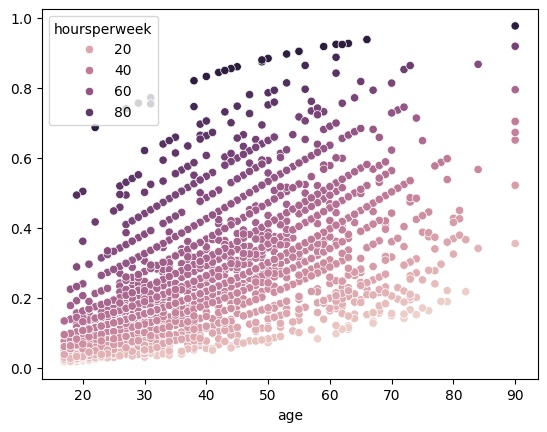

In [17]:
import seaborn as sns

sns.scatterplot(
    x=X_test["age"], 
    y=lr.predict_proba(X_test[['age', 'hoursperweek']])[:, 1],
    hue=X_test["hoursperweek"]
)

## Assignment 2: Model Tuning

1. Fit a Regression using all available features - remove features if it appears there is overfitting.

2. Tune the regularization paramters once you've decided on a set of features.

In [18]:
lr = logreg.fit(X_train.values, y_train)

print(f"Train Accuracy: {lr.score(X_train.values, y_train)}")
print(f"Test Accuracy: {lr.score(X_test.values, y_test)}")

Train Accuracy: 0.8442654991791103
Test Accuracy: 0.8497498436522827


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 2, 20),
    "penalty": ["l1", "l2", "elasticnet"],
    "l1_ratio": np.linspace(0, 1, 11)
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1175:

In [ ]:
gridsearch.best_params_

In [22]:
logreg = LogisticRegression(C=, penalty=, solver="saga", max_iter=1000)

lr = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr.score(X_train_std.values, y_train)}")
print(f"Test Accuracy: {lr.score(X_test_std.values, y_test)}")

Train Accuracy: 0.8522398561488547
Test Accuracy: 0.8567854909318324


In [25]:
confusion_matrix(lr.predict(X_test_std ), y_test)

array([[4541,  576],
       [ 340,  939]], dtype=int64)

# Multiclass Logistic Regression

1. Fit a multiclass logistic regression on the data below
2. Create a confusion matrix and report accuracy score for the test data.

In [26]:
credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN"], axis=1)

credit_df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [27]:
from sklearn.model_selection import train_test_split

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month"
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True)
y = credit_df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [28]:
X_test.head()

,Age,Month,Annual_Income,Num_Bank_Accounts,Changed_Credit_Limit,Num_Credit_Card,Credit_History_Age,Monthly_Balance,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Good,Credit_Mix_Standard
65740,42.0,5,39849.72,9.0,9.12,8.0,73.0,384.540284,14.0,2533.64,96.604035,0,1,0,0,0,1,0,0,1
11139,50.0,4,16558.12,3.0,3.57,7.0,232.0,247.055794,1.0,15.43,35.387555,1,0,0,0,0,0,1,1,0
99196,35.0,5,96047.22,3.0,4.75,3.0,212.0,742.619597,4.0,1366.21,49.656727,1,0,1,0,0,0,0,1,0
33120,26.0,1,32904.13,2.0,7.43,7.0,189.0,326.879129,2.0,781.45,46.033182,1,0,0,1,0,0,0,1,0
41199,27.0,8,32428.98,6.0,21.88,5.0,132.0,329.887223,11.0,4903.14,109.273296,0,0,0,0,0,1,0,0,0


In [29]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.617175
0.61395


c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
lr.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [31]:
y_train.value_counts()

Credit_Score
Standard    42587
Poor        23183
Good        14230
Name: count, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, lr.predict(X_train))

array([[ 3769,   272, 10189],
       [  822, 11743, 10618],
       [ 2476,  6249, 33862]], dtype=int64)

In [ ]:
list(zip(X.columns, base_model.feature_importances_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

rf.score(X_test, y_test)